In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import smirnov

## CDF Utils

In [5]:
def DKW_epsilon(n, alpha):
    return np.sqrt(-np.log(alpha) / (2*n))

def KS_dist(n, epsilon):
    cdf_val = 1 - smirnov(n, epsilon)
    return np.clip(cdf_val, 0, 1)

def KS_epsilon(n, alpha, tol=1e-8):
    # find smallest epsilon such that KS_dist(n, alpha, epsilon) >= 1-alpha
    lb = 0
    ub = 1
    for i in range(100):
        epsilon = (ub - lb) / 2 + lb
        coverage = KS_dist(n, epsilon)
        if coverage >= 1-alpha:
            if coverage - (1-alpha) <= tol:
                return epsilon
            else:
                ub = epsilon
        else:
            lb = epsilon
    raise ValueError("Too few iterations on bisection search!")

## Plot KS vs DKW Offset

n: 5.0
n: 6.0
n: 7.0
n: 8.0
n: 9.0
n: 10.0
n: 11.0
n: 12.0
n: 13.0
n: 14.0
n: 15.0
n: 16.0
n: 17.0
n: 18.0
n: 19.0
n: 20.0
n: 21.0
n: 22.0
n: 23.0
n: 24.0
n: 25.0
n: 26.0
n: 27.0
n: 28.0
n: 29.0
n: 30.0


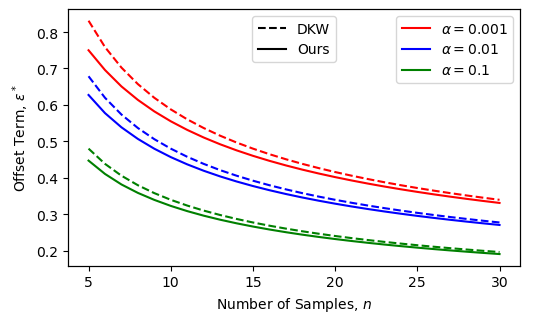

In [6]:
N = 30
ns = np.linspace(5, N, N-4) 
alphas = [0.001, 0.01, 0.1]
colors = ['red', 'blue', 'green', 'orange']

eps_ks  = np.zeros((len(ns), len(alphas)))
eps_dkw = np.zeros_like(eps_ks)

fig, ax = plt.subplots(figsize=(7*(2.5/3),4*(2.5/3)))

for i,n in enumerate(ns):
    print("n:", n)
    for j,alpha in enumerate(alphas):
        eps_dkw[i,j] = DKW_epsilon(n, alpha)
        eps_ks[i,j] = KS_epsilon(n, alpha)

for i,alpha in enumerate(alphas):
    ax.plot(ns, eps_ks[:, i], label=str(r"$\alpha = $" + str(alpha)), color=colors[i])
    ax.plot(ns, eps_dkw[:, i], linestyle='dashed', color=colors[i])

ax.set_xlabel(r"Number of Samples, $n$")
ax.set_ylabel(r'Offset Term, $\epsilon^*$')

ax2 = ax.twinx()
ax2.plot(np.NaN, np.NaN, linestyle='--', label='DKW', c='black')

ax2.plot(np.NaN, np.NaN, linestyle='-', label='Ours', c='black')
ax2.get_yaxis().set_visible(False)

ax.legend(loc='upper right')
ax2.legend(loc='upper center')

# plt.savefig("media/cdf_eps_comparison.svg")